In [2]:
data = pd.read_excel("bitcoin_dataset.xlsx")
df = data.copy()
df.head()

,Open,High,Low,Close,Volume,MA 20,MA 20 close,STD 10 high,PP 10 vol,SMA_20,SMA_50,RSI,MACD,MACD_Signal,Close_Predictions,Command
0,5360.33,5365.42,4442.12,5028.97,227276.922760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5312.64,buy
1,5028.86,5525.00,4921.45,5312.64,150089.926318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.628946,4.525789,5393.04,buy
2,5312.64,5436.17,5009.37,5393.04,137127.634894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.513972,12.923426,6162.37,buy
3,5393.26,6400.00,5252.53,6162.37,199020.873439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.068293,35.552399,6208.36,buy
4,6162.05,6900.00,5670.00,6208.36,219298.329514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.629218,66.567763,6186.98,buy


In [3]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MA 20', 'MA 20 close',
       'STD 10 high', 'PP 10 vol', 'SMA_20', 'SMA_50', 'RSI', 'MACD',
       'MACD_Signal', 'Close_Predictions', 'Command'],
      dtype='object')

In [4]:
df.columns = [c.lower() for c in df.columns]

<Axes: >

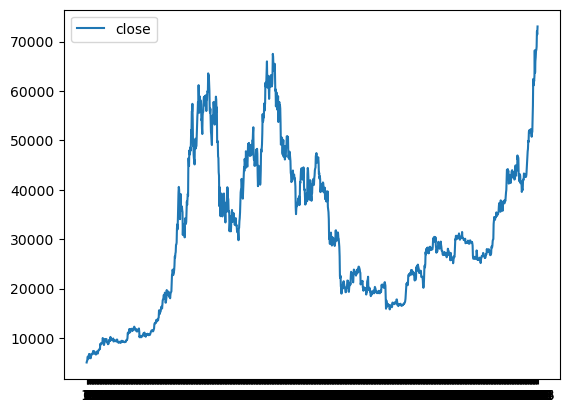

In [5]:
df.plot.line(y="close", use_index=True,xticks=df.index[::2])

In [6]:
def calculate_change_speed(df):
    change_speeds = [0] 
    for i in range(1, len(df)):
        change_speed = (df.iloc[i]['close_predictions'] - df.iloc[i-1]['close_predictions']) / df.iloc[i-1]['close_predictions']
        change_speeds.append(change_speed)
    return change_speeds

df['Change_Speed'] = calculate_change_speed(df)

df.head()

,open,high,low,close,volume,ma 20,ma 20 close,std 10 high,pp 10 vol,sma_20,sma_50,rsi,macd,macd_signal,close_predictions,command,Change_Speed
0,5360.33,5365.42,4442.12,5028.97,227276.922760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5312.64,buy,0.000000
1,5028.86,5525.00,4921.45,5312.64,150089.926318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.628946,4.525789,5393.04,buy,0.015134
2,5312.64,5436.17,5009.37,5393.04,137127.634894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.513972,12.923426,6162.37,buy,0.142652
3,5393.26,6400.00,5252.53,6162.37,199020.873439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.068293,35.552399,6208.36,buy,0.007463
4,6162.05,6900.00,5670.00,6208.36,219298.329514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.629218,66.567763,6186.98,buy,-0.003444


In [7]:
df.to_csv("deneme_bitcoin.csv" , index = False)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Öncelikle veri çerçevenizi yükleyin veya oluşturun
X, y = df.drop(columns="command"), df["command"]

# Verileri eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Test Accuracy:", accuracy_gb)

accuracy_gb_train = accuracy_score(y_train, gb_model.predict(X_train))
print("Gradient Boosting Train Accuracy:", accuracy_gb_train)

print("----------------------")


y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", accuracy_rf)


accuracy_rf_train = accuracy_score(y_train, rf_model.predict(X_train))
print("Random Forest Train Accuracy:", accuracy_rf_train)

print("----------------------")



y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Test Accuracy:", accuracy_tree)

accuracy_tree_train = accuracy_score(y_train, tree_model.predict(X_train))
print("Decision Tree Train Accuracy:", accuracy_tree_train)


Gradient Boosting Test Accuracy: 0.976027397260274
Gradient Boosting Train Accuracy: 1.0
----------------------
Random Forest Test Accuracy: 0.9691780821917808
Random Forest Train Accuracy: 1.0
----------------------
Decision Tree Test Accuracy: 0.958904109589041
Decision Tree Train Accuracy: 1.0


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Eksik değerleri içeren satırları düşürün
df = df.dropna()

# Bağımsız değişkenler (X) ve bağımlı değişkeni (y) ayırın
X, y = df.drop(columns=["close_predictions", "command"]), df["close_predictions"]

# Eğitim ve test setlerini oluşturun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Lineer Regresyon modelini eğitin
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Lineer Regresyon modelinin performansını test edin
y_pred_linear_train = model_linear.predict(X_train)
r2_linear_train = r2_score(y_train, y_pred_linear_train)
print("Linear Regression Train R^2 Score:", r2_linear_train)

y_pred_linear_test = model_linear.predict(X_test)
r2_linear_test = r2_score(y_test, y_pred_linear_test)
print("Linear Regression Test R^2 Score:", r2_linear_test)
print("----------------------")
# Random Forest modelini eğitin
model_random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=2)
model_random_forest.fit(X_train, y_train)

# Random Forest modelinin performansını test edin
y_pred_rf_train = model_random_forest.predict(X_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
print("Random Forest Train R^2 Score:", r2_rf_train)

y_pred_rf_test = model_random_forest.predict(X_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)
print("Random Forest Test R^2 Score:", r2_rf_test)
print("----------------------")

# Gradient Boosting modelini eğitin
model_gradient_boosting = GradientBoostingRegressor(n_estimators=80, min_samples_split=2)
model_gradient_boosting.fit(X_train, y_train)

# Gradient Boosting modelinin performansını test edin
y_pred_gb_train = model_gradient_boosting.predict(X_train)
r2_gb_train = r2_score(y_train, y_pred_gb_train)
print("Gradient Boosting Train R^2 Score:", r2_gb_train)

y_pred_gb_test = model_gradient_boosting.predict(X_test)
r2_gb_test = r2_score(y_test, y_pred_gb_test)
print("Gradient Boosting Test R^2 Score:", r2_gb_test)


Linear Regression Train R^2 Score: 0.9988423216546798
Linear Regression Test R^2 Score: 0.9989651035118035
----------------------
Random Forest Train R^2 Score: 0.9997498448967423
Random Forest Test R^2 Score: 0.9976410269340908
----------------------
Gradient Boosting Train R^2 Score: 0.9996993401190477
Gradient Boosting Test R^2 Score: 0.9986750720753321
